# Logistic Regression - IMT 572 Final Project

In [ ]:
#Importing Relevant libraries and modules
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
#Using the stored data from DataCleaningAndExploration_FinalProject Notebook
%store -r data

In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Measles
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,19.1,...,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0.538431
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,18.6,...,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0.229557
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,18.1,...,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0.200629
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,17.6,...,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,1.300354
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,17.2,...,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,1.405801


In [ ]:
ds=data.drop ('Country', axis=1)

In [ ]:
ds.columns

Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Measles'],
      dtype='object')

In [ ]:
### Independant Variable: Life Expectancy 
ds_X= ds.drop('Status', axis=1)
ds_y= ds["Status"]
print(ds_X.columns)
print(ds_y)

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Measles'],
      dtype='object')
0       1
1       1
2       1
3       1
4       1
       ..
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Status, Length: 2938, dtype: int64


In [ ]:
## setting the x and y values for our analyses 
X = ds_X
y = ds_y

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

In [ ]:
### scaling the dataset to units of variance and on a standard normal distribution so it can be used for the Linear Regression later on
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

In [ ]:
pca = PCA()  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 

In [ ]:
#float type array which contains variance ratios for each principal component.
explained_variance = pca.explained_variance_ratio_ 
explained_variance


array([3.09089939e-01, 1.35795482e-01, 8.77217437e-02, 7.03663658e-02,
       6.21484692e-02, 5.18869166e-02, 4.31077035e-02, 4.00626731e-02,
       3.73878457e-02, 2.89517033e-02, 2.78506724e-02, 2.39263422e-02,
       2.02374705e-02, 1.98204936e-02, 1.58027198e-02, 9.72443399e-03,
       7.45383135e-03, 5.58431152e-03, 2.95855187e-03, 1.22330733e-04])

Text(0.5, 1.0, 'variance')

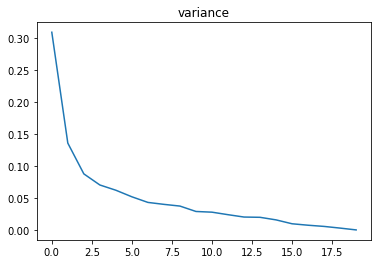

In [ ]:
pca = {'PC1','PC2','PC3','PC4', 'PC5', 'PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13', 'PC14', 'PC15','PC16','PC17','PC18','PC19','PC20'}
plt.plot(explained_variance)
plt.title("variance")

In [ ]:
### running a PCA with a 0.75 threshold  or retaining atleast 75% of the information 
pca = PCA(0.75)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 
print(X_train.shape)
print(X_test.shape)

(2350, 7)
(588, 7)


In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit (X_train, y_train)

LogisticRegression()

In [ ]:
print(logisticRegr.intercept_)

[5.10704354]


In [ ]:
print(logisticRegr.coef_)

[[ 1.9488657   0.12381515 -0.15841607  0.04736791 -0.7361902  -0.32221117
   0.29722802]]


In [ ]:
## goodness of fit-- the model can explain almost 92% of the variance in this model 
logisticRegr.score(X_train, y_train)

0.9221276595744681

In [ ]:
y_pred = (logisticRegr.predict(X_test))

In [ ]:
##Precision Score 
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='macro')

0.8772932658282977

In [ ]:
## Recall Score 
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='macro')

0.8772932658282977

In [ ]:
### running a PCA with a 0.95 threshold
pca = PCA(0.95)  
X_train = pca.fit_transform(X_train)  
X_test = pca.transform(X_test) 
logisticRegr = LogisticRegression()
logisticRegr.fit (X_train, y_train)
print(logisticRegr.score(X_train, y_train))

0.9221276595744681


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0782312925170068
Mean Squared Error: 0.0782312925170068
Root Mean Squared Error: 0.2796985743921603
